# The SleepBetter AI

In [1]:
#%pip install -q ipywidgets
#%pip install -q seaborn
#%pip install -q scikit-learn
    
##%pip install --upgrade pip    

In [2]:
#Import packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.multioutput import MultiOutputRegressor
import ipywidgets as widgets
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display, Markdown
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [3]:
# Load the dataset
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [4]:
# Display basic info and first few rows of dataset
display(df.head())
display(df.info())

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


None

In [5]:
# Loop through each numerical column and display its min and max values
for column in df.select_dtypes(include=['number']).columns:
    print(f"Max and Min for '{column}':")
    print(f"Max: {df[column].max()}")
    print(f"Min: {df[column].min()}")
    print("\n")

# Loop through each column and display unique values for string fields
for column in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print("\n")

Max and Min for 'Person ID':
Max: 374
Min: 1


Max and Min for 'Age':
Max: 59
Min: 27


Max and Min for 'Sleep Duration':
Max: 8.5
Min: 5.8


Max and Min for 'Quality of Sleep':
Max: 9
Min: 4


Max and Min for 'Physical Activity Level':
Max: 90
Min: 30


Max and Min for 'Stress Level':
Max: 8
Min: 3


Max and Min for 'Heart Rate':
Max: 86
Min: 65


Max and Min for 'Daily Steps':
Max: 10000
Min: 3000


Unique values in 'Gender':
['Male' 'Female']


Unique values in 'Occupation':
['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


Unique values in 'BMI Category':
['Overweight' 'Normal' 'Obese' 'Normal Weight']


Unique values in 'Blood Pressure':
['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']


Unique values in 'Sleep

## Exploratory Data Analysis (EDA)

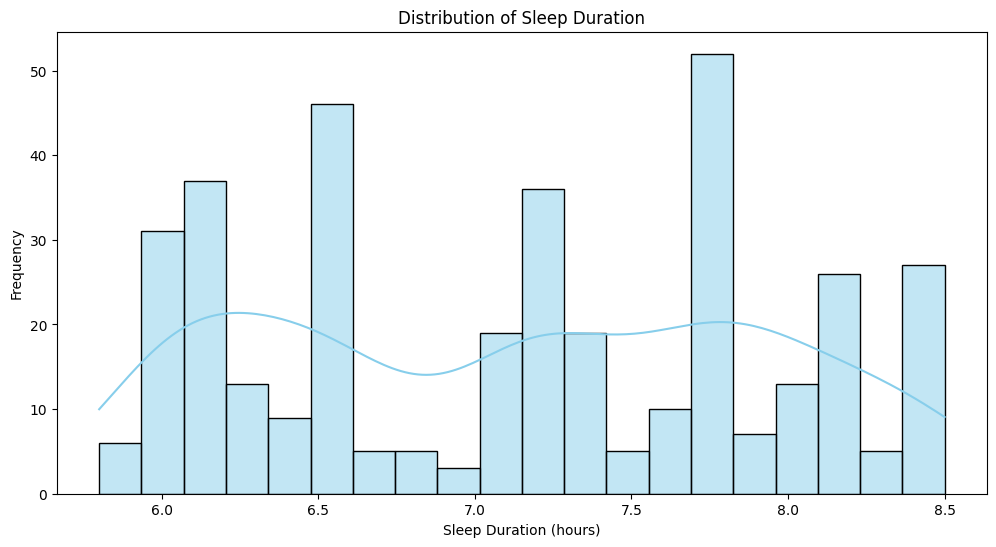

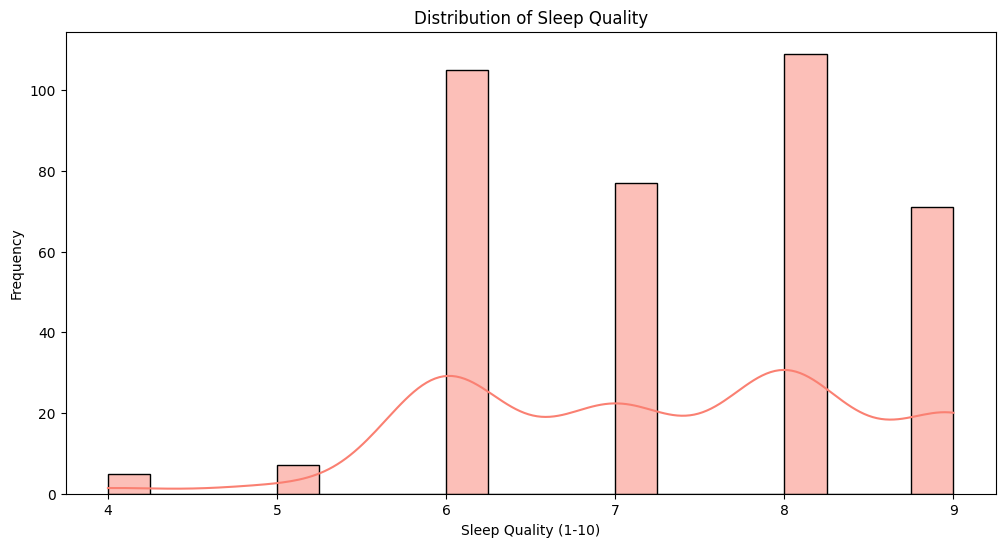

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization 1: Distribution of Sleep Duration
plt.figure(figsize=(12, 6))
sns.histplot(df['Sleep Duration'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Distribution of Sleep Quality
plt.figure(figsize=(12, 6))
sns.histplot(df['Quality of Sleep'], kde=True, color='salmon', bins=20)
plt.title('Distribution of Sleep Quality')
plt.xlabel('Sleep Quality (1-10)')
plt.ylabel('Frequency')
plt.show()


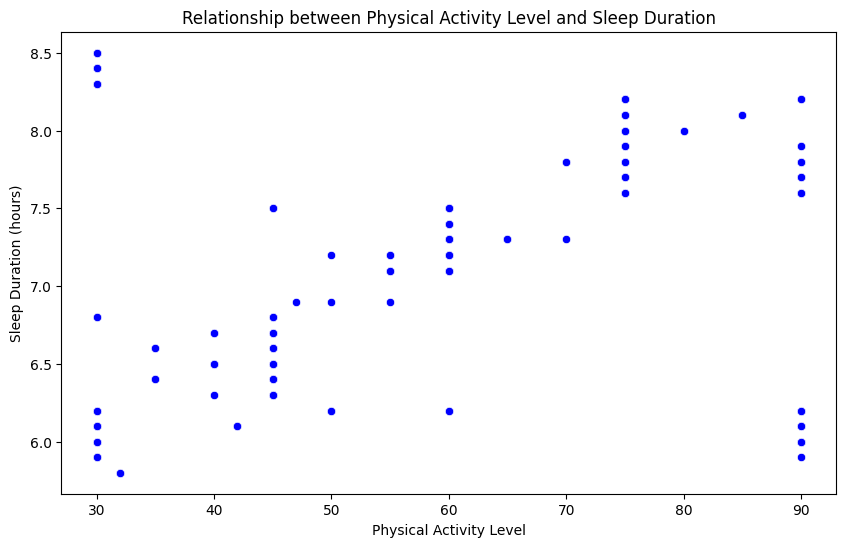

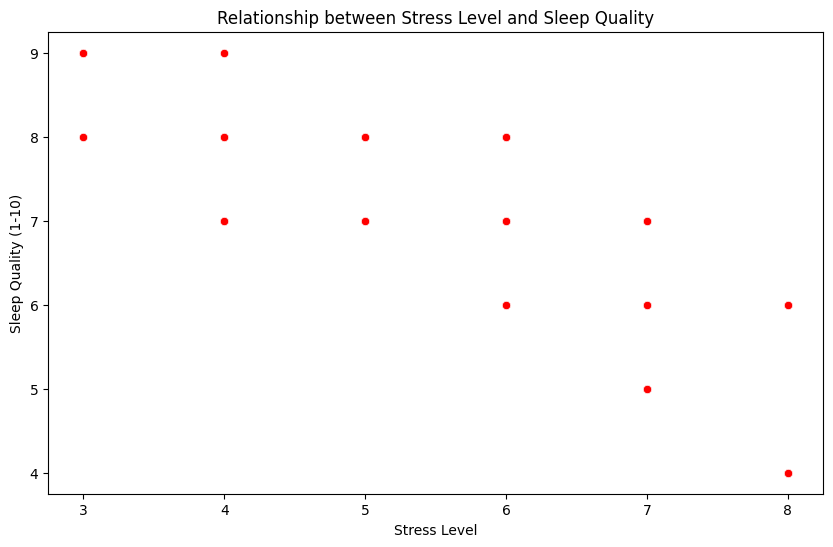

In [7]:
# Visualization 3: Scatter Plot between Sleep Duration and Physical Activity Level
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Physical Activity Level'], y=df['Sleep Duration'], color='blue')
plt.title('Relationship between Physical Activity Level and Sleep Duration')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# Visualization 4: Scatter Plot between Sleep Quality and Stress Level
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Stress Level'], y=df['Quality of Sleep'], color='red')
plt.title('Relationship between Stress Level and Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Quality (1-10)')
plt.show()


## Data Pre-Processing

In [8]:
#Change "Normal Weight" to "Normal" in the "BMI Category" column
df["BMI Category"] = df["BMI Category"].replace("Normal Weight", "Normal")

In [9]:
#Convert categorical variables into numbers

label_enc_gender = LabelEncoder()
label_enc_occupation = LabelEncoder()
label_enc_bmi = LabelEncoder()

df["Gender_Encoded"] = label_enc_gender.fit_transform(df["Gender"])
df["Occupation_Encoded"] = label_enc_occupation.fit_transform(df["Occupation"])
df["BMI_Encoded"] = label_enc_bmi.fit_transform(df["BMI Category"])

In [10]:
#Split blood pressure into separate values

df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic BP'] = pd.to_numeric(df['Systolic BP'], errors='coerce')
df['Diastolic BP'] = pd.to_numeric(df['Diastolic BP'], errors='coerce')

## Feature Selection

In [11]:
#Define features (X) and target variables (y)
X = df.drop(columns=["Sleep Duration", "Quality of Sleep", "Person ID", "Blood Pressure", "Sleep Disorder", "Gender", "Occupation", "BMI Category"])
y = df[["Sleep Duration", "Quality of Sleep"]]  # Multi-output target

In [12]:
#Feature Selection using RandomForest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y["Sleep Duration"])  # Fit on Sleep Duration as an example
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

In [13]:
#Select top features based on importance threshold
selected_features = feature_importances[feature_importances > 0.02].index.tolist()
print("Selected Features:", selected_features)

Selected Features: ['Age', 'Physical Activity Level', 'Stress Level', 'BMI_Encoded']


In [14]:
#Filter dataset to keep only selected features
X = X[selected_features]

## Multi-output Linear Regression model

In [15]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
#Standardize numerical features

scaler_x = StandardScaler()
scaler_y_duration = MinMaxScaler(feature_range=(0, 10))  # Sleep Duration (0 to 10 hours)
scaler_y_quality = MinMaxScaler(feature_range=(0, 10))  # Quality of Sleep (0 to 10)

X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

y_train_duration = scaler_y_duration.fit_transform(y_train[["Sleep Duration"]])
y_train_quality = scaler_y_quality.fit_transform(y_train[["Quality of Sleep"]])
y_train_scaled = np.hstack([y_train_duration, y_train_quality])

y_test_duration = scaler_y_duration.transform(y_test[["Sleep Duration"]])
y_test_quality = scaler_y_quality.transform(y_test[["Quality of Sleep"]])
y_test_scaled = np.hstack([y_test_duration, y_test_quality])

In [17]:
# Train a Multi-output Linear Regression model
linear_reg_model = LinearRegression()
multi_output_model = MultiOutputRegressor(linear_reg_model)
multi_output_model.fit(X_train, y_train_scaled)

MultiOutputRegressor(estimator=LinearRegression())

In [18]:
# Make predictions
y_pred = multi_output_model.predict(X_test)

In [19]:
# Inverse transform predictions and actual values back to original scale
y_test_duration = scaler_y_duration.inverse_transform(y_test_duration)
y_test_quality = scaler_y_quality.inverse_transform(y_test_quality)
y_pred_duration = scaler_y_duration.inverse_transform(y_pred[:, 0].reshape(-1, 1))
y_pred_quality = scaler_y_quality.inverse_transform(y_pred[:, 1].reshape(-1, 1))

## Model Performance 

In [20]:
# Evaluate model performance using Mean Squared Error, R-squared, and Mean Absolute Error on original scale
mse_duration = mean_squared_error(y_test_duration, y_pred_duration)
r2_duration = r2_score(y_test_duration, y_pred_duration)
mae_duration = mean_absolute_error(y_test_duration, y_pred_duration)

mse_quality = mean_squared_error(y_test_quality, y_pred_quality)
r2_quality = r2_score(y_test_quality, y_pred_quality)
mae_quality = mean_absolute_error(y_test_quality, y_pred_quality)

# Print results for Sleep Duration and Quality of Sleep
print(f"Sleep Duration - MSE: {mse_duration:.4f}, R²: {r2_duration:.4f}, MAE: {mae_duration:.4f}")
print(f"Quality of Sleep - MSE: {mse_quality:.4f}, R²: {r2_quality:.4f}, MAE: {mae_quality:.4f}")

Sleep Duration - MSE: 0.1233, R²: 0.8149, MAE: 0.2973
Quality of Sleep - MSE: 0.1001, R²: 0.9337, MAE: 0.2155


## Model Visualizations

Text(0, 0.5, 'Predicted Sleep Duration (hours)')

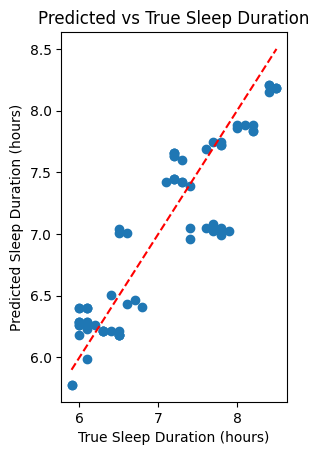

In [21]:
# Visualization 5: Predicted vs True Sleep Duration (Original Scale)
plt.subplot(1, 2, 1)
plt.scatter(y_test_duration, y_pred_duration)  # Use inverse-transformed values
plt.plot([min(y_test_duration), max(y_test_duration)],
         [min(y_test_duration), max(y_test_duration)],
         color='red', linestyle='--')  # Ideal line
plt.title("Predicted vs True Sleep Duration")
plt.xlabel("True Sleep Duration (hours)")
plt.ylabel("Predicted Sleep Duration (hours)")

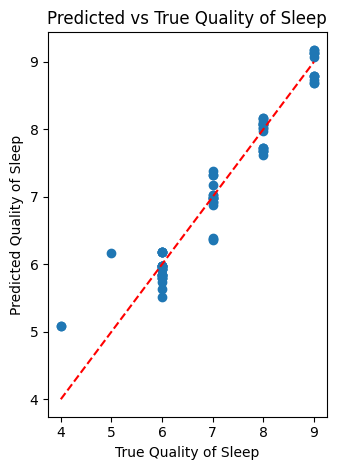

In [22]:
# Visualization 6: Predicted vs True Quality of Sleep (Original Scale)
plt.subplot(1, 2, 2)
plt.scatter(y_test_quality, y_pred_quality)  # Use inverse-transformed values
plt.plot([min(y_test_quality), max(y_test_quality)],
         [min(y_test_quality), max(y_test_quality)],
         color='red', linestyle='--')  # Ideal line
plt.title("Predicted vs True Quality of Sleep")
plt.xlabel("True Quality of Sleep")
plt.ylabel("Predicted Quality of Sleep")

plt.tight_layout()
plt.show()

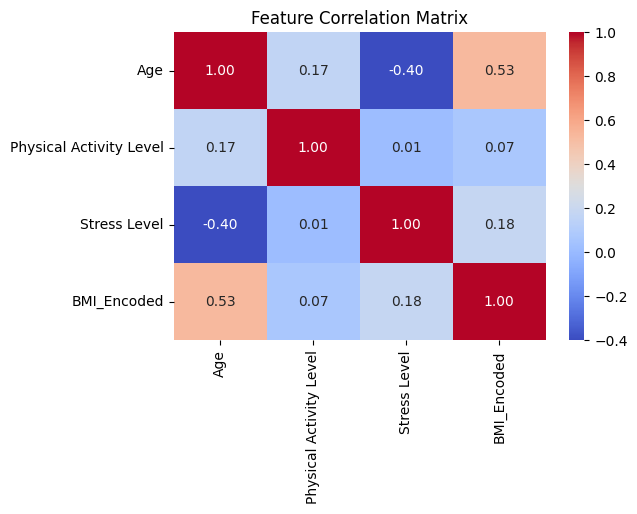

In [23]:
# Visualization 7: Feature Correlation Matrix
X_train_df = pd.DataFrame(X_train, columns=X.columns)  # Convert back to DataFrame
plt.figure(figsize=(6, 4))
sns.heatmap(X_train_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

## GUI Implementation

In [24]:
# Personalized Recommendations based on user input

def generate_recommendations(sleep_duration, sleep_quality, activity_level, stress_level, bmi_encoded):
    recommendations = []

    # Sleep Duration Recommendations
    if sleep_duration < 6:
        recommendations.append("Try to get at least 7-9 hours of sleep per night.")
    elif sleep_duration < 7:
        recommendations.append("You should aim for at least 7-9 hours of sleep for better health.")
    elif sleep_duration >= 9:
        recommendations.append("Keep up the good work! You're getting a great amount of sleep.")
    
    # Sleep Quality Recommendations
    if sleep_quality < 5:
        recommendations.append("Improve sleep hygiene by reducing screen time before bed.")
        recommendations.append("Consider avoiding caffeine and heavy meals in the evening.")
    elif sleep_quality >= 7:
        recommendations.append("Great job! You're maintaining good sleep quality. Keep it up.")
    
    # Activity Level Recommendations
    if activity_level < 50:
        recommendations.append("Consider increasing your physical activity. Regular exercise can help improve sleep and reduce stress.")
    elif activity_level >= 70:
        recommendations.append("Fantastic! You're staying very active. Keep it up to support your sleep and overall health.")
    elif activity_level >= 50 and activity_level < 70:
        recommendations.append("You're doing well, but there might be room to increase your physical activity for optimal sleep.")

    # Stress Level Recommendations
    if stress_level > 6:
        recommendations.append("High stress can impact your sleep. Try relaxation techniques like meditation or yoga.")
        recommendations.append("You may benefit from stress management practices such as deep breathing exercises.")
    elif stress_level <= 3:
        recommendations.append("Good job on keeping your stress levels low! Continue your stress management practices.")
    elif stress_level <= 5:
        recommendations.append("You're managing stress well, but finding additional ways to relax could improve your sleep even more.")

    # BMI Recommendations
    if bmi_encoded == 1:  # Overweight
        recommendations.append("Consider maintaining a balanced diet and regular exercise to reach a healthy weight.")
    elif bmi_encoded == 2:  # Obese
        recommendations.append("Consulting a healthcare provider for a weight management plan may improve your overall health and sleep quality.")
    elif bmi_encoded == 0:  # Normal
        recommendations.append("You're maintaining a healthy BMI! Keep up the good work for continued health benefits.")

    # Additional Well-Being Recommendations
    if sleep_quality < 5 or stress_level > 6:
        recommendations.append("Incorporating mindfulness or relaxation activities, like reading or journaling before bed, can help improve sleep quality.")
    if activity_level < 50 and stress_level > 6:
        recommendations.append("Consider finding a low-impact physical activity like walking or swimming to both reduce stress and improve sleep.")

    return recommendations


In [25]:
# Define user interface for predictions
def user_interface():
    explanation = """
    **Explanation of Scales:**
    
    **Physical Activity Level:**  
    
    - Measures how much physical activity the individual engages in.  
    - 30-90 scale, 30 being very low and 90 being very high.

    **Stress Level:**  
    
    - Measures how stressed an individual is, scale of 3 to 8, where 3 is minimal stress and 8 is extremely high stress.

    **BMI Encoded:**  
    
    - Body Mass Index (BMI) is a numerical value derived from an individual's weight and height.  
    
    - The encoded version represents a category mapped to a number: Normal == 0, Overweight == 1, and Obese == 2.
    """
    
    # Display explanation as markdown for better formatting
    display(Markdown(explanation))
    display(Markdown("\nEnter values for the following:"))
    
input_widgets = widgets.VBox([
    widgets.IntSlider(
        min=int(df[feature].min()), 
        max=int(df[feature].max()), 
        description=feature, 
        style={'description_width': 'auto'}  # Adjust description width dynamically
    )
    for feature in selected_features
])
output = widgets.Output()

# Now calling the user_interface function
user_interface()

def predict_button_clicked(b):
    with output:
        output.clear_output()
        user_input_values = [w.value for w in input_widgets.children]
        user_input = np.array([user_input_values])
        #user_input_scaled = scaler_x.transform(user_input)
        user_input_scaled = scaler_x.transform(pd.DataFrame(user_input, columns=selected_features))

        #Predicting based on user input
        raw_predictions = multi_output_model.predict(user_input_scaled)
        predictions = raw_predictions.copy()
        predictions[:, 0] = np.clip(predictions[:, 0], 0, 10)
        predictions[:, 1] = np.clip(predictions[:, 1], 0, 10)

        # Inverse transform to original scale
        sleep_duration_pred = scaler_y_duration.inverse_transform(predictions[:, 0].reshape(-1, 1))[0][0]
        quality_of_sleep_pred = scaler_y_quality.inverse_transform(predictions[:, 1].reshape(-1, 1))[0][0]

        #Display predictions
        display(Markdown(f"Predicted Sleep Duration: {sleep_duration_pred:.2f} hours"))
        display(Markdown(f"Predicted Quality of Sleep: {quality_of_sleep_pred:.2f}/10"))

        # Retrieve user input values for recommendations
        activity_level = user_input[0][selected_features.index('Physical Activity Level')]
        stress_level = user_input[0][selected_features.index('Stress Level')]
        bmi_encoded = user_input[0][selected_features.index('BMI_Encoded')]

        # Generate and display personalized recommendations
        recommendations = generate_recommendations(sleep_duration_pred, quality_of_sleep_pred, activity_level, stress_level, bmi_encoded)
        display(Markdown("### Personalized Recommendations:"))
        for rec in recommendations:
            display(Markdown(f"- {rec}"))

button = widgets.Button(description="Get Prediction")
button.on_click(predict_button_clicked)
display(input_widgets, button, output)




    **Explanation of Scales:**
    
    **Physical Activity Level:**  
    
    - Measures how much physical activity the individual engages in.  
    - 30-90 scale, 30 being very low and 90 being very high.

    **Stress Level:**  
    
    - Measures how stressed an individual is, scale of 3 to 8, where 3 is minimal stress and 8 is extremely high stress.

    **BMI Encoded:**  
    
    - Body Mass Index (BMI) is a numerical value derived from an individual's weight and height.  
    
    - The encoded version represents a category mapped to a number: Normal == 0, Overweight == 1, and Obese == 2.
    


Enter values for the following:

Button(description='Get Prediction', style=ButtonStyle())

Output()